In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# $\star$ Question 2: 
Estimate the mean and covariance matrix of the dataset *gaussian.npz* via ML
estimation.

Plot the points and indicate the mean via a cross and the covariance via an
ellipse. 

Consult the matplotlib documentation to see how to draw an ellipse. 
(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Ellipse.html)


You obtain the ellipse axes by an eigen-decomposition of the matrix (Numpy function linalg.eig). 

The scaling of the axes is given by the eigenvalues. Review the concept of an eigen-decomposition in the
internet or a math book if you lack this basic math knowledge.

# Question 2.1: Mean and Covariance estimation 
Estimate the mean and covariance matrix of the dataset, you can compare these to the built in numpy functions and see if you see a difference.

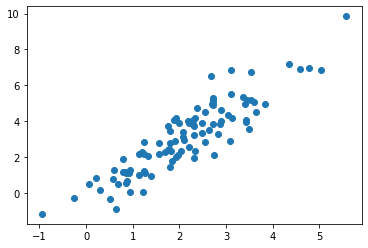

In [3]:
data = np.load('../data/gaussian.npz')
gaussian = data["arr_0"]

plt.scatter(gaussian[:, 0], gaussian[:, 1])   # look at how the data is distributed


In [5]:
N = len(gaussian)

mu1 = 0
for i in range(0, N):
    mu1 = mu1 + gaussian[i, 0]
mu1 = mu1/N

mu2 = 0
for i in range(0, N):
    mu2 = mu2 + gaussian[i, 1]
mu2 = mu2/N

mean = np.array([mu1, mu2])
print("The estimated mean is:")
print(mean)
print()

true_mean = np.mean(gaussian, 0)     # compare result with numpy built in mean function
print("The mean calcualted using Numpy is:")
print(true_mean)
print()

cov = 1/(N)*np.dot((gaussian-mean).T, (gaussian-mean))
print("The estimated covariance is:")
print(cov)
print()

true_cov = np.cov(gaussian.T)        # compare to numpy cov function, slightly different since NP uses the N-1 bias correction
print("The covariance calcualted using Numpy is:")
print(true_cov)

The estimated mean is:
[2.12308534 3.12168402]

The mean calcualted using Numpy is:
[2.12308534 3.12168402]

The estimated covariance is:
[[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]]

The covariance calcualted using Numpy is:
[[1.35117126 2.10306646]
 [2.10306646 4.02666029]]


# Question 2.2: Plotting the graph
Plot the points and indicate the mean via a cross and the covariance via an
ellipse

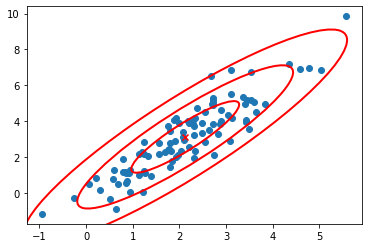

In [6]:
eig_w, eig_v = np.linalg.eig(cov)    # calculates the eigen vectors from the covariance matrix

fig, ax = plt.subplots()

# draws 3 different covariances representing 1, 2 and 3 standard deviations
# width and height are times by 2 since sqrt of the eigenval only measures half the distance
for i in range(3):

    ell = Ellipse(xy=[mu1, mu2], width=np.sqrt(eig_w[0])*2*(i+1), height=np.sqrt(eig_w[1])*2*(i+1), angle=np.rad2deg(np.arccos(eig_v[0, 0])), edgecolor='red', lw=2, facecolor='none')
    ax.add_artist(ell)


plt.scatter(gaussian[:, 0], gaussian[:, 1])
plt.scatter(mean[0], mean[1], c="red", marker="x")

# $\star\star$ Question 3:
Create reduced datasets by considering only the first 2, 5, 10 points and estimate the mean via MAP. 

Use the ML estimate of the covariance $ \Sigma $ <sub>**ML,100**</sub> (estimated from all 100 points) as known covariance. 

Assume the conjugate prior with $\mu_0 = (2,3)^T $ and covariance $\Sigma_0 =\Sigma $ <sub>**ML,100**</sub>


Draw the ML and the MAP estimates into the point clouds (the covariance is the same as it is assumed to be known here). 

How reliable is the ML estimate when there are only few measurements? 

Now work with a slightly wrong prior $\mu_0 = (2,5)^T $
and see how the effect of the prior is reduced as more measurements come
in.

# Question 3.1: Using the correct prior
Using   $\mu_0 = (2,3)^T $



In [ ]:
def MapMeanEstimator(X, n, cov, mean0):
    gaussian_n = X[0:n, :]   # creates a reduced dataset
    cov0 = cov               # the cov estimated via ML from the full 100pts    
    mean_n = np.mean(gaussian_n, 0)   # uses the numpy calculation for the mean as there was no difference to our ML estimate

    covn = np.linalg.inv(np.linalg.inv(cov)+n*np.linalg.inv(cov))                   # [0]  see here and below for the multivariate cases
    MAPmean_n = covn@(n*(np.linalg.inv(cov)@mean_n)+(np.linalg.inv(cov0)@mean0))    # [1]

    print("The MAP mean estimate from %s data points is:" % (n) )
    print(MAPmean_n)
    print()

    return MAPmean_n


[0] [https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf](https://) page 17 equation (211)



[1] [https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf](https://) Page 17 equation(212)


The MAP mean estimate from 2 data points is:
[2.79051738 4.17201882]

The MAP mean estimate from 5 data points is:
[2.21560731 3.29619296]

The MAP mean estimate from 10 data points is:
[2.56752927 4.00546172]



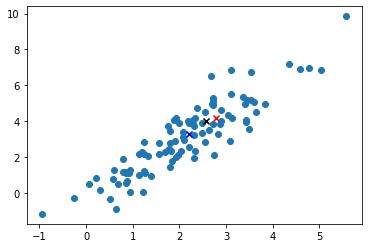

In [ ]:
mean0 = np.array([2, 3])

MAPmean2 = MapMeanEstimator(gaussian, 2, cov, mean0)
MAPmean5 = MapMeanEstimator(gaussian, 5, cov, mean0)
MAPmean10 = MapMeanEstimator(gaussian, 10, cov, mean0)

plt.scatter(gaussian[:, 0], gaussian[:, 1])
plt.scatter(MAPmean2[0], MAPmean2[1], c="red", marker="x")
plt.scatter(MAPmean5[0], MAPmean5[1], c="blue", marker="x")
plt.scatter(MAPmean10[0], MAPmean10[1], c="black", marker="x")

# Question 3.2: Using a slightly wrong prior
Using $\mu_0 = (2,5)^T $

The MAP mean estimate from 2 data points is:
[2.79051738 4.83868548]

The MAP mean estimate from 5 data points is:
[2.21560731 3.62952629]

The MAP mean estimate from 10 data points is:
[2.56752927 4.1872799 ]



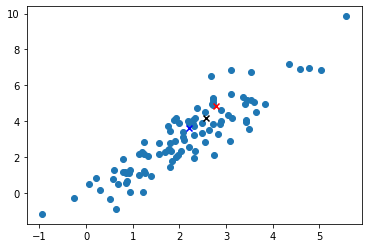

In [ ]:
mean0 = np.array([2, 5])

MAPmean2 = MapMeanEstimator(gaussian, 2, cov, mean0)
MAPmean5 = MapMeanEstimator(gaussian, 5, cov, mean0)
MAPmean10 = MapMeanEstimator(gaussian, 10, cov, mean0)

plt.scatter(gaussian[:, 0], gaussian[:, 1])
plt.scatter(MAPmean2[0], MAPmean2[1], c="red", marker="x")
plt.scatter(MAPmean5[0], MAPmean5[1], c="blue", marker="x")
plt.scatter(MAPmean10[0], MAPmean10[1], c="black", marker="x")

# $\star$ Question 4:
Estimate mean and covariance of the dataset *gaussianplus.npz* using ML and show
the result. How well does the estimate reflect the true data?

The estimated mean is:
[2.78150432 3.4206865 ]

The estimated covariance is:
[[3.37496477 2.68822246]
 [2.68822246 3.8456476 ]]



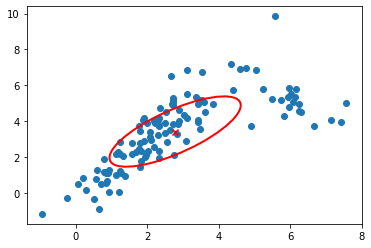

In [ ]:
data = np.load('data/gaussianplus.npz')
gaussianplus = data["arr_0"]

N = len(gaussianplus)

mu1 = 0
for i in range(0, N):
    mu1 = mu1 + gaussianplus[i, 0]
mu1 = mu1/N

mu2 = 0
for i in range(0, N):
    mu2 = mu2 + gaussianplus[i, 1]
mu2 = mu2/N

mean = np.array([mu1, mu2])
print("The estimated mean is:")
print(mean)
print()

cov = 1/(N)*np.dot((gaussianplus-mean).T, (gaussianplus-mean))
print("The estimated covariance is:")
print(cov)
print()


eig_w, eig_v = np.linalg.eig(cov)

fig, ax = plt.subplots()
ell = Ellipse(xy=[mu1, mu2], width=np.sqrt(eig_w[0])*2, height=np.sqrt(eig_w[1])*2, angle=np.rad2deg(np.arccos(eig_v[0, 0])), edgecolor='red', lw=2, facecolor='none')
ax.add_artist(ell)

plt.scatter(gaussianplus[:, 0], gaussianplus[:, 1])
plt.scatter(mean[0], mean[1], c="red", marker="x")